In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from scipy.stats import ranksums
from sklearn.feature_selection import mutual_info_regression
import matplotlib.patches as mpatches
import os
import matplotlib.patches as mpatches
from scipy.stats import ranksums
from matplotlib import font_manager
from scipy.optimize import curve_fit

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
if not os.path.exists('lstmPlots'):
    os.mkdir('lstmPlots')

In [8]:
font_dirs = ['/storage/home/hcoda1/8/zmobille3/scratch/arial']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
# font_manager.get_font_names()

plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=22
plt.rcParams['axes.titlesize']=22
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

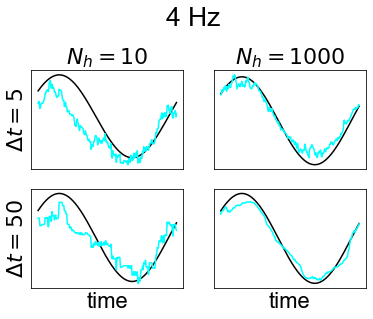

In [4]:
  
delta_t_list = [5,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layer = 'h'
layerNames = ['hidden']
pcon=0.3

fig,ax=plt.subplots(2,2)
plt.suptitle('4 Hz',y=1.1)
for nhi in range(len(Nhvec)):
    nh = Nhvec[nhi]
    ax[0,nhi].set_title(f'$N_h={nh}$')
    for dti in range(numDeltas):
        deltat = delta_t_list[dti]
        ax[dti,0].set_ylabel(f'$\Delta t={deltat}$')
        seed = 0
        path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
        ytest_path = path + '/y4test.npy'
        ytest = np.load(ytest_path)
        ypred_avg = np.zeros(ytest.shape)
        ax[dti,nhi].plot(ytest[:,0],color='black')
        ax[dti,nhi].set_xticks([])
        ax[dti,nhi].set_yticks([])
        ax[1,nhi].set_xlabel('time')
        for seed in range(numseeds):
            ypred_path = path + f'/y4pred_{layer}.npy'
            ypred = np.load(ypred_path)
            ypred_avg += ypred
        ypred_avg /= numseeds
        ax[dti,nhi].plot(ypred_avg[:,0],color='cyan')
                
                

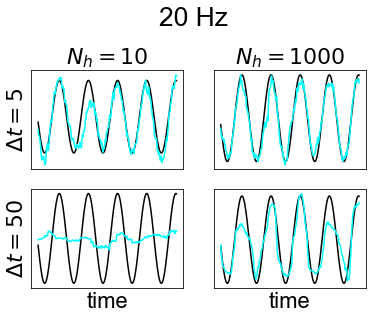

In [5]:
  
delta_t_list = [5,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layer = 'h'
layerNames = ['hidden']
pcon=0.3

fig,ax=plt.subplots(2,2)
plt.suptitle('20 Hz',y=1.1)
for nhi in range(len(Nhvec)):
    nh = Nhvec[nhi]
    ax[0,nhi].set_title(f'$N_h={nh}$')
    for dti in range(numDeltas):
        deltat = delta_t_list[dti]
        ax[dti,0].set_ylabel(f'$\Delta t={deltat}$')
        seed = 0
        path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
        ytest_path = path + '/y20test.npy'
        ytest = np.load(ytest_path)
        ypred_avg = np.zeros(ytest.shape)
        ax[dti,nhi].plot(ytest[:,0],color='black')
        ax[dti,nhi].set_xticks([])
        ax[dti,nhi].set_yticks([])
        ax[1,nhi].set_xlabel('time')
        for seed in range(numseeds):
            ypred_path = path + f'/y20pred_{layer}.npy'
            ypred = np.load(ypred_path)
            ypred_avg += ypred
        ypred_avg /= numseeds
        ax[dti,nhi].plot(ypred_avg[:,0],color='cyan')
                
                

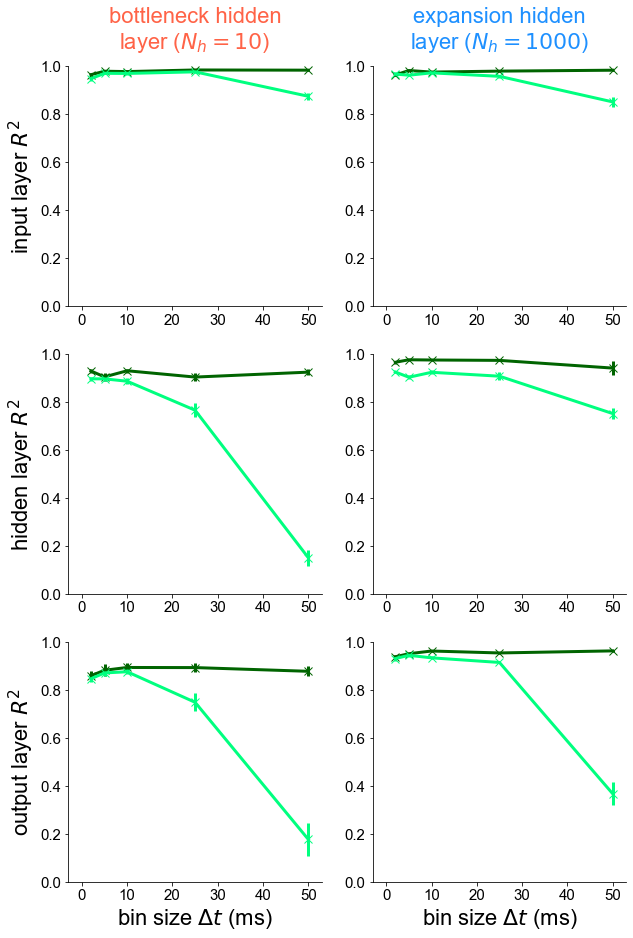

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
# delta_t_list = [5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['in','h','out']
layerNames = ['input','hidden','output']

pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]

fig,ax=plt.subplots(3,2,figsize=(10,15))
ax[0,0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom,y=1.05)
ax[0,1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod,y=1.05)
for li in range(len(layers)):
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        nh = Nhvec[nhi]
        all_R2s_4Hz = np.zeros((numseeds,numDeltas))
        all_R2s_20Hz = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/y4test.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/y4pred_{layer}.npy'
                ypred = np.load(ypred_path)
                all_R2s_4Hz[seed,dti] = r2_score(ytest,ypred)
                
                ytest_path = path + '/y20test.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/y20pred_{layer}.npy'
                ypred = np.load(ypred_path)
                all_R2s_20Hz[seed,dti] = r2_score(ytest,ypred)
                
        mean_R2s_4Hz = all_R2s_4Hz.mean(axis=0)
        maxi = np.argmax(mean_R2s_4Hz)
        high = mean_R2s_4Hz[maxi]
        mini = -1
        low = mean_R2s_4Hz[mini]
        ax[li,nhi].set_xlim([-3,53])
        sd_R2s_4Hz = all_R2s_4Hz.std(axis=0)
        sem_R2s_4Hz = sd_R2s_4Hz/np.sqrt(numseeds)
        ax[li,nhi].errorbar(delta_t_list,mean_R2s_4Hz,sem_R2s_4Hz,color='darkgreen',marker='x',
                         linewidth=3,markersize=8,zorder=1)
#colors=['darkgreen','mediumseagreen','springgreen']
        
        mean_R2s_20Hz = all_R2s_20Hz.mean(axis=0)
        maxi = np.argmax(mean_R2s_20Hz)
        high = mean_R2s_20Hz[maxi]
        mini = -1
        low = mean_R2s_20Hz[mini]
        ax[li,nhi].set_xlim([-3,53])
        sd_R2s_20Hz = all_R2s_20Hz.std(axis=0)
        sem_R2s_20Hz = sd_R2s_20Hz/np.sqrt(numseeds)
        ax[li,nhi].errorbar(delta_t_list,mean_R2s_20Hz,sem_R2s_20Hz,color='springgreen',marker='x',
                         linewidth=3,markersize=8,zorder=1)
        
        if nhi == 0:
            ax[li,nhi].set_ylabel(f'{layerName} layer $R^2$')
        if li == 2:
            ax[li,nhi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[li,nhi].tick_params(axis='x')
        ax[li,nhi].tick_params(axis='y')
        ax[li,nhi].set_ylim([0,1])
        ax[li,nhi].set_xticks([0,10,20,30,40,50])
sns.despine()
orange = mpatches.Patch(color='orange',label='4 Hz')
green = mpatches.Patch(color='green',label='20 Hz')
# ax[1,1].legend(handles=[orange,green],bbox_to_anchor=(1.5,0.7),fontsize=18)

plt.savefig(f'lstmPlots/R2_v_deltat_allLayers_freqs_noLeg.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/R2_v_deltat_allLayers_freqs_noLeg.jpg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

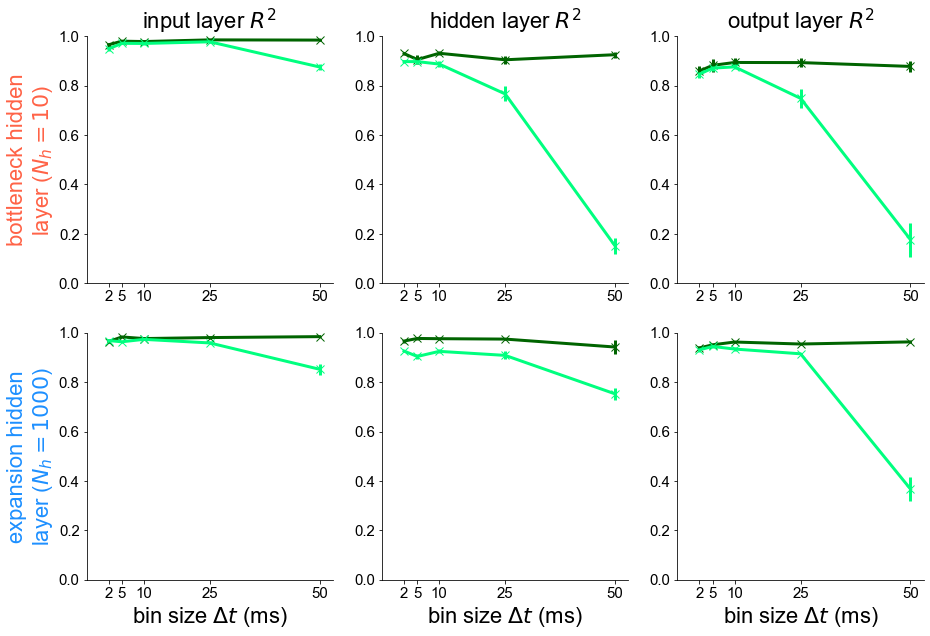

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
# delta_t_list = [5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['in','h','out']
layerNames = ['input','hidden','output']

pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]

fig,ax=plt.subplots(2,3,figsize=(15,10))
ax[0,0].set_ylabel('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1,0].set_ylabel('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for li in range(len(layers)):
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        nh = Nhvec[nhi]
        all_R2s_4Hz = np.zeros((numseeds,numDeltas))
        all_R2s_20Hz = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/y4test.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/y4pred_{layer}.npy'
                ypred = np.load(ypred_path)
                all_R2s_4Hz[seed,dti] = r2_score(ytest,ypred)
                
                ytest_path = path + '/y20test.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/y20pred_{layer}.npy'
                ypred = np.load(ypred_path)
                all_R2s_20Hz[seed,dti] = r2_score(ytest,ypred)
                
        mean_R2s_4Hz = all_R2s_4Hz.mean(axis=0)
        maxi = np.argmax(mean_R2s_4Hz)
        high = mean_R2s_4Hz[maxi]
        mini = -1
        low = mean_R2s_4Hz[mini]
        ax[nhi,li].set_xlim([-3,53])
        sd_R2s_4Hz = all_R2s_4Hz.std(axis=0)
        sem_R2s_4Hz = sd_R2s_4Hz/np.sqrt(numseeds)
        ax[nhi,li].errorbar(delta_t_list,mean_R2s_4Hz,sem_R2s_4Hz,color='darkgreen',marker='x',
                         linewidth=3,markersize=8,zorder=1)
#colors=['darkgreen','mediumseagreen','springgreen']
        
        mean_R2s_20Hz = all_R2s_20Hz.mean(axis=0)
        maxi = np.argmax(mean_R2s_20Hz)
        high = mean_R2s_20Hz[maxi]
        mini = -1
        low = mean_R2s_20Hz[mini]
        ax[nhi,li].set_xlim([-3,53])
        sd_R2s_20Hz = all_R2s_20Hz.std(axis=0)
        sem_R2s_20Hz = sd_R2s_20Hz/np.sqrt(numseeds)
        ax[nhi,li].errorbar(delta_t_list,mean_R2s_20Hz,sem_R2s_20Hz,color='springgreen',marker='x',
                         linewidth=3,markersize=8,zorder=1)
        
        if nhi == 0:
#             ax[nhi,li].set_ylabel(f'{layerName} layer $R^2$')
            ax[nhi,li].set_title(f'{layerName} layer $R^2$')
        if nhi == 1:
            ax[nhi,li].set_xlabel('bin size $\Delta t$ (ms)')
        ax[nhi,li].tick_params(axis='x')
        ax[nhi,li].tick_params(axis='y')
        ax[nhi,li].set_ylim([0,1])
#         ax[nhi,li].set_xticks([0,10,20,30,40,50])
        ax[nhi,li].set_xticks(delta_t_list)
sns.despine()
orange = mpatches.Patch(color='orange',label='4 Hz')
green = mpatches.Patch(color='green',label='20 Hz')
# ax[1,1].legend(handles=[orange,green],bbox_to_anchor=(1.5,0.7),fontsize=18)

plt.savefig(f'lstmPlots/R2_v_deltat_allLayers_freqs_hori.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/R2_v_deltat_allLayers_freqs_hori.jpg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

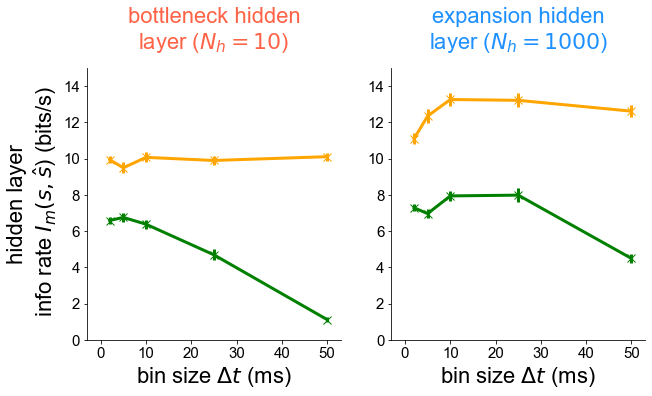

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
# delta_t_list = [5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']

pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom,y=1.05)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod,y=1.05)
for li in range(len(layers)):
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        nh = Nhvec[nhi]
        all_MIs_4Hz = np.zeros((numseeds,numDeltas))
        all_MIs_20Hz = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/y4test.npy'
                ytest = np.load(ytest_path)
                num_ms = len(ytest)
                num_s = num_ms/1000.
                Xp = ytest.flatten()
                X = np.reshape(Xp,(len(Xp),1))
                ypred_path = path + f'/y4pred_{layer}.npy'
                ypred = np.load(ypred_path)
                y = ypred.flatten()
                mi = mutual_info_regression(X,y)[0]/np.log(2)
                all_MIs_4Hz[seed,dti] = mi*(mi>0)/num_s
                
                ytest_path = path + '/y20test.npy'
                ytest = np.load(ytest_path)
                Xp = ytest.flatten()
                X = np.reshape(Xp,(len(Xp),1))
                ypred_path = path + f'/y20pred_{layer}.npy'
                ypred = np.load(ypred_path)
                y = ypred.flatten()
                mi = mutual_info_regression(X,y)[0]/np.log(2)
                all_MIs_20Hz[seed,dti] = mi*(mi>0)/num_s
                
        mean_MIs_4Hz = all_MIs_4Hz.mean(axis=0)
        maxi = np.argmax(mean_MIs_4Hz)
        high = mean_MIs_4Hz[maxi]
        mini = -1
        low = mean_MIs_4Hz[mini]
        ax[nhi].set_xlim([-3,53])
        sd_MIs_4Hz = all_MIs_4Hz.std(axis=0)
        sem_MIs_4Hz = sd_MIs_4Hz/np.sqrt(numseeds)
        ax[nhi].errorbar(delta_t_list,mean_MIs_4Hz,sem_MIs_4Hz,color='orange',marker='x',
                         linewidth=3,markersize=8,zorder=1)
        
        mean_MIs_20Hz = all_MIs_20Hz.mean(axis=0)
        maxi = np.argmax(mean_MIs_20Hz)
        high = mean_MIs_20Hz[maxi]
        mini = -1
        low = mean_MIs_20Hz[mini]
        ax[nhi].set_xlim([-3,53])
        sd_MIs_20Hz = all_MIs_20Hz.std(axis=0)
        sem_MIs_20Hz = sd_MIs_20Hz/np.sqrt(numseeds)
        ax[nhi].errorbar(delta_t_list,mean_MIs_20Hz,sem_MIs_20Hz,color='green',marker='x',
                         linewidth=3,markersize=8,zorder=1)
        
        if nhi == 0:
            ax[nhi].set_ylabel('%s layer\n info rate $I_m(s,\hat{s}$) (bits/s)'%(layerName))
        if li == 0:
            ax[nhi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[nhi].tick_params(axis='x')
        ax[nhi].tick_params(axis='y')
        ax[nhi].set_ylim([0,15])
        ax[nhi].set_xticks([0,10,20,30,40,50])
sns.despine()

# red_patch = mpatches.Patch(color='red', label='The red data')
# plt.legend(handles=[red_patch])
orange = mpatches.Patch(color='orange',label='4 Hz')
green = mpatches.Patch(color='green',label='20 Hz')
# ax[1].legend(handles=[orange,green],bbox_to_anchor=(1.5,0.7),fontsize=18)

plt.savefig(f'lstmPlots/mi_v_deltat_hidden_freqs_noLeg.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/mi_v_deltat_hidden_freqs_noLeg.jpg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

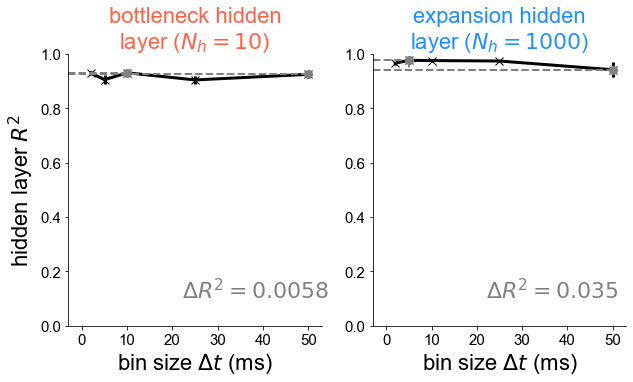

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
# delta_t_list = [5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']

pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]


fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for li in range(len(layers)):
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        nh = Nhvec[nhi]
        all_R2s = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/y4test.npy'
                ytest = np.load(ytest_path)
#                 print(ytest.shape)
                ypred_path = path + f'/y4pred_{layer}.npy'
                ypred = np.load(ypred_path)
#                 plt.plot(ytest[:,0],label='true')
#                 plt.plot(ypred[:,0],label='predicted')
#                 plt.legend()
#                 plt.show()
#                 plt.close()
                all_R2s[seed,dti] = r2_score(ytest,ypred)
        mean_R2s = all_R2s.mean(axis=0)
        maxi = np.argmax(mean_R2s)
        high = mean_R2s[maxi]
        mini = -1
        low = mean_R2s[mini]
        ax[nhi].hlines(high,-3,delta_t_list[maxi],linestyle='--',color='gray',linewidth=2)
        ax[nhi].hlines(low,-3,delta_t_list[mini],linestyle='--',color='gray',linewidth=2)
        ax[nhi].vlines(delta_t_list[maxi],high,low,linestyle='--',color='gray',linewidth=2)
        ax[nhi].set_xlim([-3,53])
        ax[nhi].text(22,0.1,f'$\Delta R^2={high-low:.2}$',color='gray',fontsize=22)

        sd_R2s = all_R2s.std(axis=0)
        sem_R2s = sd_R2s/np.sqrt(numseeds)
        ax[nhi].errorbar(delta_t_list,mean_R2s,sem_R2s,color='black',marker='x',linewidth=3,markersize=8,zorder=1)
        ax[nhi].plot(delta_t_list[maxi],high,color='gray',marker='o',markersize=8,zorder=2)
        ax[nhi].plot(delta_t_list[mini],low,color='gray',marker='o',markersize=8,zorder=2)
        if nhi == 0:
            ax[nhi].set_ylabel(f'{layerName} layer $R^2$')
        if li == 0:
            ax[nhi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[nhi].tick_params(axis='x')
        ax[nhi].tick_params(axis='y')
        ax[nhi].set_ylim([0,1])
        ax[nhi].set_xticks([0,10,20,30,40,50])
sns.despine()
# ax[0].legend(ncol=2,handles=[blue,magenta],bbox_to_anchor=(2.05,1.35),fontsize=18)

# plt.savefig(f'lstmPlots/R2_v_deltat_hidden_predict.svg',bbox_inches='tight',dpi=200)
# plt.savefig(f'lstmPlots/R2_v_deltat_hidden_predict.jpg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

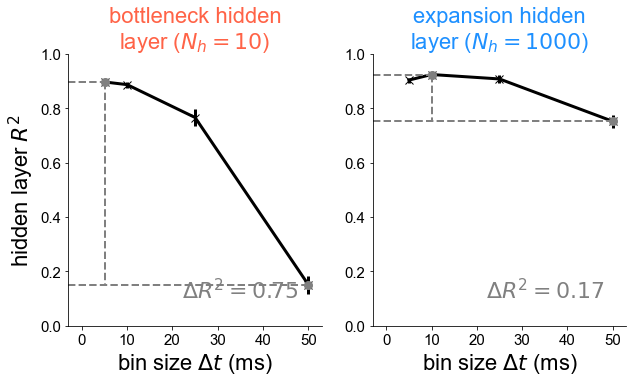

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
# delta_t_list = [2,5,10,25,50]
delta_t_list = [5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']

pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]


fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for li in range(len(layers)):
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        nh = Nhvec[nhi]
        all_R2s = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/y20test.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/y20pred_{layer}.npy'
                ypred = np.load(ypred_path)
                all_R2s[seed,dti] = r2_score(ytest,ypred)
        mean_R2s = all_R2s.mean(axis=0)
        maxi = np.argmax(mean_R2s)
        high = mean_R2s[maxi]
        mini = -1
        low = mean_R2s[mini]
        ax[nhi].hlines(high,-3,delta_t_list[maxi],linestyle='--',color='gray',linewidth=2)
        ax[nhi].hlines(low,-3,delta_t_list[mini],linestyle='--',color='gray',linewidth=2)
        ax[nhi].vlines(delta_t_list[maxi],high,low,linestyle='--',color='gray',linewidth=2)
        ax[nhi].set_xlim([-3,53])
        ax[nhi].text(22,0.1,f'$\Delta R^2={high-low:.2}$',color='gray',fontsize=22)

        sd_R2s = all_R2s.std(axis=0)
        sem_R2s = sd_R2s/np.sqrt(numseeds)
        ax[nhi].errorbar(delta_t_list,mean_R2s,sem_R2s,color='black',marker='x',linewidth=3,markersize=8,zorder=1)
        ax[nhi].plot(delta_t_list[maxi],high,color='gray',marker='o',markersize=8,zorder=2)
        ax[nhi].plot(delta_t_list[mini],low,color='gray',marker='o',markersize=8,zorder=2)
        if nhi == 0:
            ax[nhi].set_ylabel(f'{layerName} layer $R^2$')
        if li == 0:
            ax[nhi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[nhi].tick_params(axis='x')
        ax[nhi].tick_params(axis='y')
        ax[nhi].set_ylim([0,1])
        ax[nhi].set_xticks([0,10,20,30,40,50])
sns.despine()
# ax[0].legend(ncol=2,handles=[blue,magenta],bbox_to_anchor=(2.05,1.35),fontsize=18)

# plt.savefig(f'lstmPlots/R2_v_deltat_hidden_predict.svg',bbox_inches='tight',dpi=200)
# plt.savefig(f'lstmPlots/R2_v_deltat_hidden_predict.jpg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'LSTMbayesdecodeData/Nh10/pcon0.3/seed0/deltat2/ytest.npy'

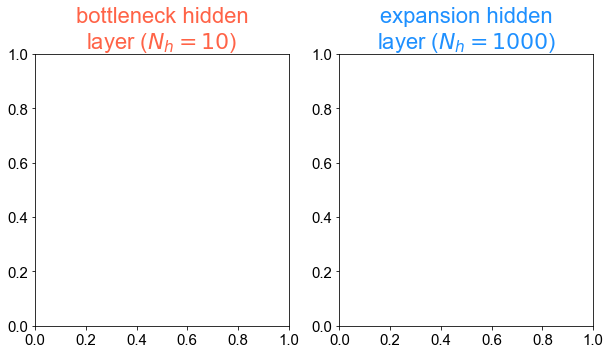

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]


fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for li in range(len(layers)):
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        nh = Nhvec[nhi]
        all_R2s = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                all_R2s[seed,dti] = r2_score(ytest,ypred)
        mean_R2s = all_R2s.mean(axis=0)
        maxi = np.argmax(mean_R2s)
        high = mean_R2s[maxi]
        mini = -1
        low = mean_R2s[mini]
        ax[nhi].hlines(high,-3,delta_t_list[maxi],linestyle='--',color='gray',linewidth=2)
        ax[nhi].hlines(low,-3,delta_t_list[mini],linestyle='--',color='gray',linewidth=2)
        ax[nhi].vlines(delta_t_list[maxi],high,low,linestyle='--',color='gray',linewidth=2)
        ax[nhi].set_xlim([-3,53])
        ax[nhi].text(22,0.1,f'$\Delta R^2={high-low:.2}$',color='gray',fontsize=22)

        sd_R2s = all_R2s.std(axis=0)
        sem_R2s = sd_R2s/np.sqrt(numseeds)
        ax[nhi].errorbar(delta_t_list,mean_R2s,sem_R2s,color='black',marker='x',linewidth=3,markersize=8,zorder=1)
        ax[nhi].plot(delta_t_list[maxi],high,color='gray',marker='o',markersize=8,zorder=2)
        ax[nhi].plot(delta_t_list[mini],low,color='gray',marker='o',markersize=8,zorder=2)
        if nhi == 0:
            ax[nhi].set_ylabel(f'{layerName} layer $R^2$')
        if li == 0:
            ax[nhi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[nhi].tick_params(axis='x')
        ax[nhi].tick_params(axis='y')
        ax[nhi].set_ylim([0,1])
        ax[nhi].set_xticks([0,10,20,30,40,50])
sns.despine()
# ax[0].legend(ncol=2,handles=[blue,magenta],bbox_to_anchor=(2.05,1.35),fontsize=18)

plt.savefig(f'lstmPlots/R2_v_deltat_hidden_predict.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/R2_v_deltat_hidden_predict.jpg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

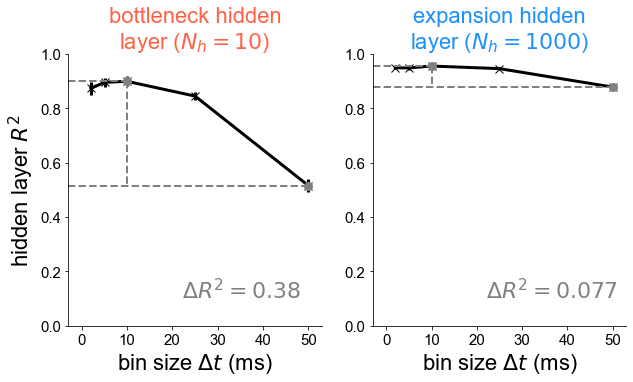

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]


fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for li in range(len(layers)):
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        nh = Nhvec[nhi]
        all_R2s = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                all_R2s[seed,dti] = r2_score(ytest,ypred)
        mean_R2s = all_R2s.mean(axis=0)
        maxi = np.argmax(mean_R2s)
        high = mean_R2s[maxi]
        mini = -1
        low = mean_R2s[mini]
        ax[nhi].hlines(high,-3,delta_t_list[maxi],linestyle='--',color='gray',linewidth=2)
        ax[nhi].hlines(low,-3,delta_t_list[mini],linestyle='--',color='gray',linewidth=2)
        ax[nhi].vlines(delta_t_list[maxi],high,low,linestyle='--',color='gray',linewidth=2)
        ax[nhi].set_xlim([-3,53])
        ax[nhi].text(22,0.1,f'$\Delta R^2={high-low:.2}$',color='gray',fontsize=22)

        sd_R2s = all_R2s.std(axis=0)
        sem_R2s = sd_R2s/np.sqrt(numseeds)
        ax[nhi].errorbar(delta_t_list,mean_R2s,sem_R2s,color='black',marker='x',linewidth=3,markersize=8,zorder=1)
        ax[nhi].plot(delta_t_list[maxi],high,color='gray',marker='o',markersize=8,zorder=2)
        ax[nhi].plot(delta_t_list[mini],low,color='gray',marker='o',markersize=8,zorder=2)
        if nhi == 0:
            ax[nhi].set_ylabel(f'{layerName} layer $R^2$')
        if li == 0:
            ax[nhi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[nhi].tick_params(axis='x')
        ax[nhi].tick_params(axis='y')
        ax[nhi].set_ylim([0,1])
        ax[nhi].set_xticks([0,10,20,30,40,50])
sns.despine()
# ax[0].legend(ncol=2,handles=[blue,magenta],bbox_to_anchor=(2.05,1.35),fontsize=18)

plt.savefig(f'lstmPlots/R2_v_deltat_hidden.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/R2_v_deltat_hidden.jpg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

7.852614211537559e-05


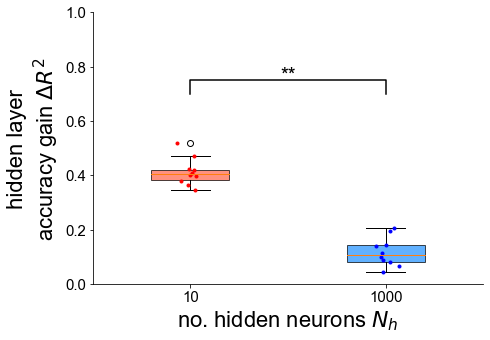

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

fig,ax=plt.subplots(figsize=(7,5))

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

# maxidx=4
# minidx=-4



# fig,ax = plt.subplots(1,2,figsize=(8,4))
# ax[0].set_title('bottleneck ($N_h=10$)',fontsize=15)
# ax[1].set_title('expansion ($N_h=1000$)',fontsize=15)
for li in range(len(layers)):
    delta_R2s=np.zeros((numseeds,len(Nhvec)))
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        
        nh = Nhvec[nhi]
        all_R2s = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeDataPredict/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                all_R2s[seed,dti] = r2_score(ytest,ypred)
        for seed in range(numseeds):
#             ax[nhi].plot(all_R2s[seed,:],linewidth=0.5)
            R2_v_dt=all_R2s[seed,:]
            maxidx=np.argmax(R2_v_dt)
            minidx=np.argmin(R2_v_dt)
            maxR2=R2_v_dt[maxidx]
            minR2=R2_v_dt[minidx]
            delta_R2s[seed,nhi] = maxR2-minR2

bplot=plt.boxplot(delta_R2s,patch_artist=True,widths=0.4)
clrs=['tomato','dodgerblue']
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
#     patch.set_facecolor(color)
#     [patch.set(facecolor='color', alpha=1.0) for patch in bp['boxes']]


clrs=['red','blue']
plt.ylim([0,1])
for i in [1,2]:
    clr=clrs[i-1]
    y=delta_R2s[:,i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')
plt.ylabel('hidden layer\naccuracy gain $\Delta R^2$')
plt.xticks([1,2],[10,1000])
plt.yticks(fontsize=15)
plt.xlabel('no. hidden neurons $N_h$')

stat, pval = ranksums(delta_R2s[:,0], delta_R2s[:,1], alternative='greater')
if pval < 0.05:
    p='**'
print(pval)

x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 0.7, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+2*h, p, ha='center', va='top', color=col, fontsize=20)

sns.despine()
# plt.savefig('plotDir/accGain_boxplot.jpg',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/accGain_boxplot_arial_predict.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/accGain_boxplot_arial_predict.svg',bbox_inches='tight',dpi=200)
plt.show()

            

7.852614211537559e-05


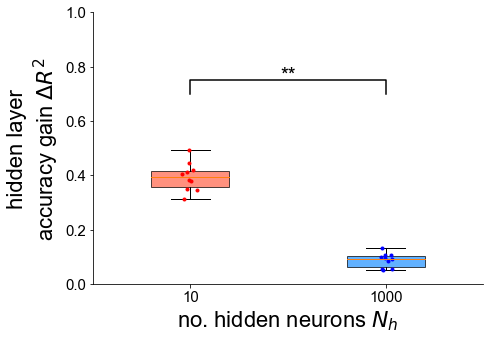

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

fig,ax=plt.subplots(figsize=(7,5))

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

# maxidx=4
# minidx=-4



# fig,ax = plt.subplots(1,2,figsize=(8,4))
# ax[0].set_title('bottleneck ($N_h=10$)',fontsize=15)
# ax[1].set_title('expansion ($N_h=1000$)',fontsize=15)
for li in range(len(layers)):
    delta_R2s=np.zeros((numseeds,len(Nhvec)))
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        
        nh = Nhvec[nhi]
        all_R2s = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                all_R2s[seed,dti] = r2_score(ytest,ypred)
        for seed in range(numseeds):
#             ax[nhi].plot(all_R2s[seed,:],linewidth=0.5)
            R2_v_dt=all_R2s[seed,:]
            maxidx=np.argmax(R2_v_dt)
            minidx=np.argmin(R2_v_dt)
            maxR2=R2_v_dt[maxidx]
            minR2=R2_v_dt[minidx]
            delta_R2s[seed,nhi] = maxR2-minR2

bplot=plt.boxplot(delta_R2s,patch_artist=True,widths=0.4)
clrs=['tomato','dodgerblue']
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
#     patch.set_facecolor(color)
#     [patch.set(facecolor='color', alpha=1.0) for patch in bp['boxes']]


clrs=['red','blue']
plt.ylim([0,1])
for i in [1,2]:
    clr=clrs[i-1]
    y=delta_R2s[:,i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')
plt.ylabel('hidden layer\naccuracy gain $\Delta R^2$')
plt.xticks([1,2],[10,1000])
plt.yticks(fontsize=15)
plt.xlabel('no. hidden neurons $N_h$')

stat, pval = ranksums(delta_R2s[:,0], delta_R2s[:,1], alternative='greater')
if pval < 0.05:
    p='**'
print(pval)

x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 0.7, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+2*h, p, ha='center', va='top', color=col, fontsize=20)

sns.despine()
# plt.savefig('plotDir/accGain_boxplot.jpg',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/accGain_boxplot_arial.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/accGain_boxplot_arial.svg',bbox_inches='tight',dpi=200)
plt.show()

            

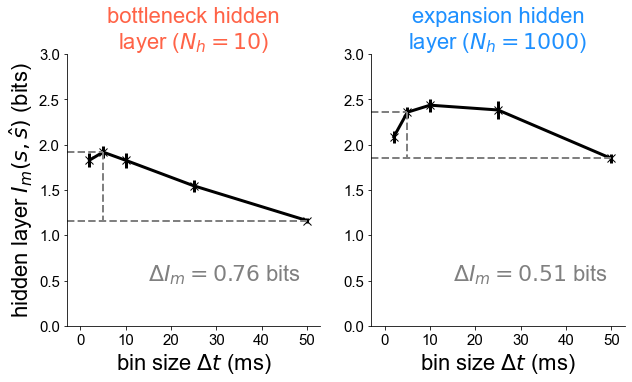

In [10]:
if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]


fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for li in range(len(layers)):
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        nh = Nhvec[nhi]
        all_MIs = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeDataPredict/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                X = ytest.flatten()
                X = np.reshape(X,(len(X),1))
                y = ypred.flatten()
                all_MIs[seed,dti] = mutual_info_regression(X,y)[0]/np.log(2)
        mean_MIs = all_MIs.mean(axis=0)
        maxi = np.argmax(mean_MIs)
        maxi = 1
        high = mean_MIs[maxi]
        mini = -1
        low = mean_MIs[mini]
        ax[nhi].hlines(high,-3,delta_t_list[maxi],linestyle='--',color='gray',linewidth=2)
        ax[nhi].hlines(low,-3,delta_t_list[mini],linestyle='--',color='gray',linewidth=2)
        ax[nhi].vlines(delta_t_list[maxi],high,low,linestyle='--',color='gray',linewidth=2)
        ax[nhi].set_xlim([-3,53])
        change = high-low
        ax[nhi].text(15,0.5,r'$\Delta I_m =%.2f$ bits'%change,color='gray',fontsize=22)

        sd_MIs = all_MIs.std(axis=0)
        sem_MIs = sd_MIs/np.sqrt(numseeds)
        ax[nhi].errorbar(delta_t_list,mean_MIs,sem_MIs,color='black',marker='x',linewidth=3,markersize=8,zorder=1)
#         ax[nhi].plot(delta_t_list[maxi],high,color='gray',marker='o',markersize=8,zorder=2)
#         ax[nhi].plot(delta_t_list[mini],low,color='gray',marker='o',markersize=8,zorder=2)
        if nhi == 0:
            ax[nhi].set_ylabel(r'%s layer $I_m(s,\hat{s})$ (bits)'%(layerName))
        if li == 0:
            ax[nhi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[nhi].tick_params(axis='x')
        ax[nhi].tick_params(axis='y')
        ax[nhi].set_ylim([0,3])
        ax[nhi].set_xticks([0,10,20,30,40,50])
sns.despine()
# ax[0].legend(ncol=2,handles=[blue,magenta],bbox_to_anchor=(2.05,1.35),fontsize=18)

plt.savefig(f'lstmPlots/MI_v_deltat_hidden_predict.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/MI_v_deltat_hidden_predict.jpg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

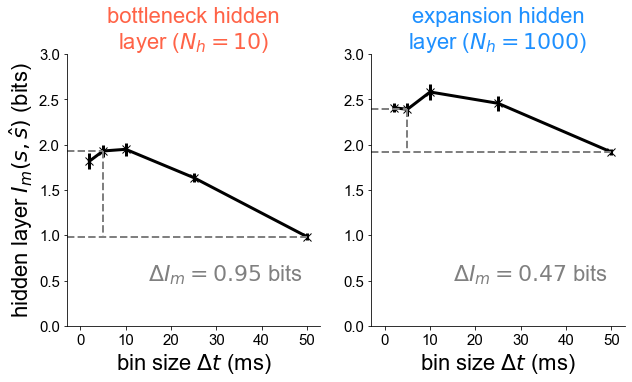

In [11]:
if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]


fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for li in range(len(layers)):
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        nh = Nhvec[nhi]
        all_MIs = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                X = ytest.flatten()
                X = np.reshape(X,(len(X),1))
                y = ypred.flatten()
                all_MIs[seed,dti] = mutual_info_regression(X,y)[0]/np.log(2)
        mean_MIs = all_MIs.mean(axis=0)
        maxi = np.argmax(mean_MIs)
        maxi = 1
        high = mean_MIs[maxi]
        mini = -1
        low = mean_MIs[mini]
        ax[nhi].hlines(high,-3,delta_t_list[maxi],linestyle='--',color='gray',linewidth=2)
        ax[nhi].hlines(low,-3,delta_t_list[mini],linestyle='--',color='gray',linewidth=2)
        ax[nhi].vlines(delta_t_list[maxi],high,low,linestyle='--',color='gray',linewidth=2)
        ax[nhi].set_xlim([-3,53])
        change = high-low
        ax[nhi].text(15,0.5,r'$\Delta I_m =%.2f$ bits'%change,color='gray',fontsize=22)

        sd_MIs = all_MIs.std(axis=0)
        sem_MIs = sd_MIs/np.sqrt(numseeds)
        ax[nhi].errorbar(delta_t_list,mean_MIs,sem_MIs,color='black',marker='x',linewidth=3,markersize=8,zorder=1)
#         ax[nhi].plot(delta_t_list[maxi],high,color='gray',marker='o',markersize=8,zorder=2)
#         ax[nhi].plot(delta_t_list[mini],low,color='gray',marker='o',markersize=8,zorder=2)
        if nhi == 0:
            ax[nhi].set_ylabel(r'%s layer $I_m(s,\hat{s})$ (bits)'%(layerName))
        if li == 0:
            ax[nhi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[nhi].tick_params(axis='x')
        ax[nhi].tick_params(axis='y')
        ax[nhi].set_ylim([0,3])
        ax[nhi].set_xticks([0,10,20,30,40,50])
sns.despine()
# ax[0].legend(ncol=2,handles=[blue,magenta],bbox_to_anchor=(2.05,1.35),fontsize=18)

plt.savefig(f'lstmPlots/MI_v_deltat_hidden.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/MI_v_deltat_hidden.jpg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

0.02468309737596635


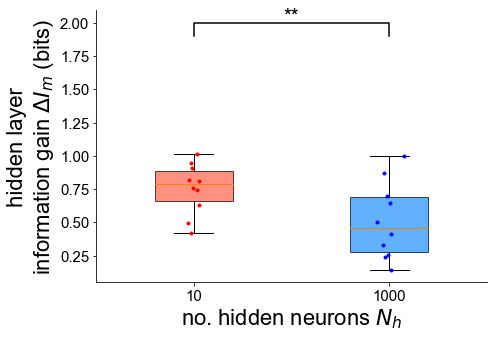

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

fig,ax=plt.subplots(figsize=(7,5))

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

# maxidx=4
# minidx=-4



# fig,ax = plt.subplots(1,2,figsize=(8,4))
# ax[0].set_title('bottleneck ($N_h=10$)',fontsize=15)
# ax[1].set_title('expansion ($N_h=1000$)',fontsize=15)
for li in range(len(layers)):
    delta_R2s=np.zeros((numseeds,len(Nhvec)))
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        
        nh = Nhvec[nhi]
        all_MIs = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeDataPredict/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                X = ytest.flatten()
                X = np.reshape(X,(len(X),1))
                y = ypred.flatten()
                all_MIs[seed,dti] = mutual_info_regression(X,y)[0]/np.log(2)
        for seed in range(numseeds):
            MI_v_dt=all_MIs[seed,:]
#             maxidx=np.argmax(MI_v_dt)
            maxidx=1
            minidx=-1
            maxMI=MI_v_dt[maxidx]
            minMI=MI_v_dt[minidx]
            delta_R2s[seed,nhi] = maxMI-minMI

bplot=plt.boxplot(delta_R2s,patch_artist=True,widths=0.4)
clrs=['tomato','dodgerblue']
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
#     patch.set_facecolor(color)
#     [patch.set(facecolor='color', alpha=1.0) for patch in bp['boxes']]


clrs=['red','blue']
# plt.ylim([0,1])
for i in [1,2]:
    clr=clrs[i-1]
    y=delta_R2s[:,i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')
plt.ylabel('hidden layer\ninformation gain $\Delta I_m$ (bits)')
plt.xticks([1,2],[10,1000])
plt.yticks(fontsize=15)
plt.xlabel('no. hidden neurons $N_h$')

stat, pval = ranksums(delta_R2s[:,0], delta_R2s[:,1], alternative='greater')
if pval < 0.05:
    p='**'
else:
    p='n.s.'
print(pval)

x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 1.9, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+2.2*h, p, ha='center', va='top', color=col, fontsize=20)

sns.despine()
# plt.savefig('plotDir/accGain_boxplot.jpg',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/infoGain_boxplot_predict.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/infoGain_boxplot_predict.svg',bbox_inches='tight',dpi=200)
plt.show()

            

0.004075485796751346


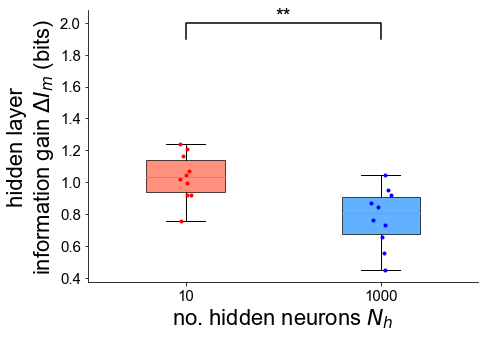

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

fig,ax=plt.subplots(figsize=(7,5))

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

# maxidx=4
# minidx=-4



# fig,ax = plt.subplots(1,2,figsize=(8,4))
# ax[0].set_title('bottleneck ($N_h=10$)',fontsize=15)
# ax[1].set_title('expansion ($N_h=1000$)',fontsize=15)
for li in range(len(layers)):
    delta_R2s=np.zeros((numseeds,len(Nhvec)))
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        
        nh = Nhvec[nhi]
        all_MIs = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                X = ytest.flatten()
                X = np.reshape(X,(len(X),1))
                y = ypred.flatten()
                all_MIs[seed,dti] = mutual_info_regression(X,y)[0]/np.log(2)
        for seed in range(numseeds):
            MI_v_dt=all_MIs[seed,:]
            maxidx=np.argmax(MI_v_dt)
            minidx=-1
            maxMI=MI_v_dt[maxidx]
            minMI=MI_v_dt[minidx]
            delta_R2s[seed,nhi] = maxMI-minMI

bplot=plt.boxplot(delta_R2s,patch_artist=True,widths=0.4)
clrs=['tomato','dodgerblue']
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
#     patch.set_facecolor(color)
#     [patch.set(facecolor='color', alpha=1.0) for patch in bp['boxes']]


clrs=['red','blue']
# plt.ylim([0,1])
for i in [1,2]:
    clr=clrs[i-1]
    y=delta_R2s[:,i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')
plt.ylabel('hidden layer\ninformation gain $\Delta I_m$ (bits)')
plt.xticks([1,2],[10,1000])
plt.yticks(fontsize=15)
plt.xlabel('no. hidden neurons $N_h$')

stat, pval = ranksums(delta_R2s[:,0], delta_R2s[:,1], alternative='greater')
if pval < 0.05:
    p='**'
print(pval)

x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 1.9, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+2*h, p, ha='center', va='top', color=col, fontsize=20)

sns.despine()
# plt.savefig('plotDir/accGain_boxplot.jpg',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/infoGain_boxplot.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/infoGain_boxplot.svg',bbox_inches='tight',dpi=200)
plt.show()

            